In [1]:
#importations 
import pandas_datareader as yf
from pandas_datareader import data, wb
import pandas as pd
from datetime import datetime
import seaborn as sb

In [2]:
#le téléchargement 
StartDate="2019-01-01"
now = datetime.now()
EndDate = now.strftime("%y:%m:%d")

In [3]:
df= data.DataReader(["SREN.SW","IUES.sw", "IUHC.sw", "IUIT.sw", "IUFS.sw", "IUCD.sw", "IUCS.sw", "IUMS.sw", "IUIS.sw", "IUUS.sw", "IUCM.sw"],start=StartDate, end=EndDate, data_source='yahoo')

In [4]:
pf = df.loc[df.index[:],'Close']
pf=pf.resample('D').fillna("pad")
MonthIndex= pd.date_range('12/1/2019', periods=13, freq='BM')
pfBol=pf.index.isin(MonthIndex)
pf1=pf[pfBol]
pf1=pf1.append(pf.iloc[-2,:])

In [38]:
pftot=pf1.iloc[-2,:]/pf1.iloc[0,:]
pftot = pd.DataFrame(pftot, columns=['total'])
pftot= pftot.transpose()
pf1=pf1.append(pftot)
pf1Sort=pf1.sort_values(by = 'total',axis=1)
pf1Sort=pf1Sort.iloc[:-1,:]



ValueError: The index label 'total' is not unique.

In [35]:
pf1Sort.index = pd.to_datetime(pf1Sort.index).strftime('%b')
pfDelta=pf1Sort.pct_change()
pfDelta=pfDelta.iloc[1:,:]

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-12-01 00:00:00

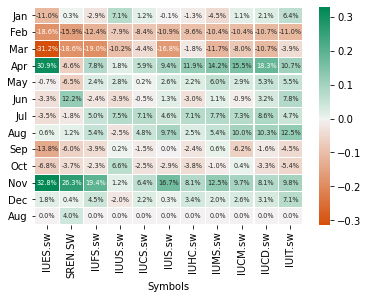

In [36]:
cmap=sb.diverging_palette(20,145, s=100, as_cmap=True)
heatM = sb.heatmap(pfDelta,cmap=cmap, annot=True,annot_kws={"size": 6.5}, fmt=".1%",center=0, linewidths=.1)
heatM.figure.savefig('sectoral.png', dpi=800)